In [0]:
from netCDF4 import Dataset

In [0]:
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [0]:
import datetime

In [0]:
from mpl_toolkits.basemap import Basemap, addcyclic , shiftgrid

In [0]:
nc=Dataset("G:/r_data/air.sig995.2012.nc")

In [0]:
nc

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: COARDS
    title: mean daily NMC reanalysis (2012)
    history: created 2011/12 by Hoop (netCDF2.3)
    description: Data is from NMC initialized reanalysis
(4x/day).  These are the 0.9950 sigma level values.
    platform: Model
    references: http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html
    dimensions(sizes): lat(73), lon(144), time(366)
    variables(dimensions): float32 lat(lat), float32 lon(lon), float64 time(time), int16 air(time,lat,lon)
    groups: 

In [0]:
print(nc)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: COARDS
    title: mean daily NMC reanalysis (2012)
    history: created 2011/12 by Hoop (netCDF2.3)
    description: Data is from NMC initialized reanalysis
(4x/day).  These are the 0.9950 sigma level values.
    platform: Model
    references: http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html
    dimensions(sizes): lat(73), lon(144), time(366)
    variables(dimensions): float32 lat(lat), float32 lon(lon), float64 time(time), int16 air(time,lat,lon)
    groups: 



In [0]:
nc.variables

OrderedDict([('lat', <class 'netCDF4._netCDF4.Variable'>
              float32 lat(lat)
                  units: degrees_north
                  actual_range: [ 90. -90.]
                  long_name: Latitude
                  standard_name: latitude
                  axis: Y
              unlimited dimensions: 
              current shape = (73,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('lon', <class 'netCDF4._netCDF4.Variable'>
              float32 lon(lon)
                  units: degrees_east
                  long_name: Longitude
                  actual_range: [  0.  357.5]
                  standard_name: longitude
                  axis: X
              unlimited dimensions: 
              current shape = (144,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('time', <class 'netCDF4._netCDF4.Variable'>
              float64 time(time)
                  units: hours since 1-1-1 00:00:0.

In [0]:
lats=nc.variables['lat'][:]
lons=nc.variables['lon'][:]
time=nc.variables['time'][:]


In [0]:
time.shape

(366,)

In [0]:
air=nc.variables['air'][:,:,:]

In [0]:
#import xarray as xr
df1=xr.open_dataset("G:/r_data/air.sig995.2012.nc")

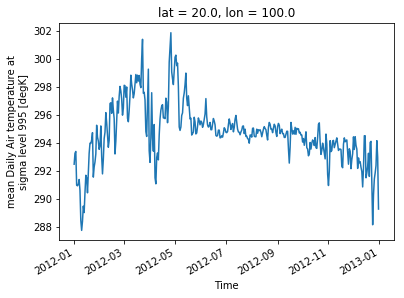

In [0]:
lati=20.20;loni=100
dsloc=df1.sel(lon=loni,lat=lati,method='nearest')
dsloc['air'].plot()

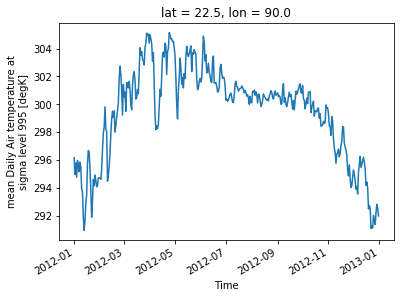

In [0]:
lati=23.20;loni=90
dsloc=df1.sel(lon=loni,lat=lati,method='nearest')
dsloc['air'].plot()

In [0]:
%matplotlib inline

In [0]:
time_idx = 237  # some random day in 2012
# Python and the renalaysis are slightly off in time so this fixes that problem
offset = dt.timedelta(hours=48)
# List of all times in the file as datetime objects
dt_time = [dt.date(1, 1, 1) + dt.timedelta(hours=t) - offset\
           for t in time]
cur_time = dt_time[time_idx]



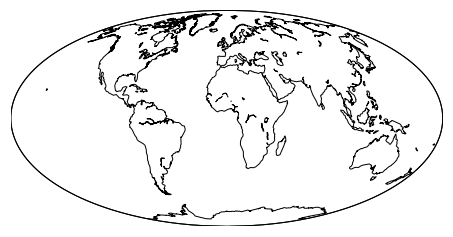

In [0]:
# Plot of global temperature on our random day
fig = plt.figure()
fig.subplots_adjust(left=0., right=1., bottom=0., top=0.9)
# Setup the map. See http://matplotlib.org/basemap/users/mapsetup.html
# for other projections.
m = Basemap(projection='moll', llcrnrlat=-90, urcrnrlat=90,\
            llcrnrlon=0, urcrnrlon=360, resolution='c', lon_0=0)
m.drawcoastlines()
m.drawmapboundary()
# Make the plot continuous


In [0]:
m = Basemap(projection='moll', llcrnrlat=-90, urcrnrlat=90,\
            llcrnrlon=0, urcrnrlon=360, resolution='c', lon_0=lat)

In [0]:
air.shape

(366, 73, 144)

In [0]:
air.mean()

278.2846686794587

In [0]:
air.shape

(366, 73, 144)

In [0]:
tmp.mean()

280.5011415525114

In [0]:
tmp.shape

(73, 144)

In [0]:
lats.shape

(73,)

In [0]:
lons.shape

(144,)

In [0]:
lats_0=lats.mean()

In [0]:
lons_0=lons.mean()

In [0]:
m = Basemap(projection='moll'
            , urcrnrlon=360, resolution='c', lon_0=lons_0,lat_0=lats_0)

In [0]:
lon,lat=np.meshgrid(lons,lats)

In [0]:
xi,yi=m(lon,lat)

In [0]:
z=np.squeeze(air)

In [0]:
z

masked_array(
  data=[[[234.5, 234.5, 234.5, ..., 234.5, 234.5, 234.5],
         [235.70001220703125, 235.75, 235.80001831054688, ...,
          235.8800048828125, 235.80001831054688, 235.73001098632812],
         [238.80001831054688, 239.60000610351562, 240.48001098632812,
          ..., 237.20001220703125, 237.58999633789062,
          238.14999389648438],
         ...,
         [251.95001220703125, 252.10000610351562, 252.25, ...,
          251.70001220703125, 251.75, 251.80001831054688],
         [251.10000610351562, 251.1300048828125, 251.17999267578125,
          ..., 251.05001831054688, 251.07000732421875,
          251.07000732421875],
         [250.05001831054688, 250.05001831054688, 250.05001831054688,
          ..., 250.05001831054688, 250.05001831054688,
          250.05001831054688]],

        [[235.33999633789062, 235.33999633789062, 235.33999633789062,
          ..., 235.33999633789062, 235.33999633789062,
          235.33999633789062],
         [232.45001220703125, 232.

In [0]:
map = Basemap(resolution='l', projection='eck4', lat_0=0, lon_0=0)

In [0]:
lon, lat = np.meshgrid(lons, lats)
xi, yi = map(lon, lat)

In [0]:
from netCDF4 import date2index
from datetime import datetime
timeindex=date2index(datetime(2012,1,25),nc.variables['time'])

In [0]:
tmp1=nc.variables['air'][timeindex]

In [0]:
tmp1.shape

(73, 144)

In [0]:
print(tmp1.mean(),tmp.mean())

275.808599695586 280.5011415525114


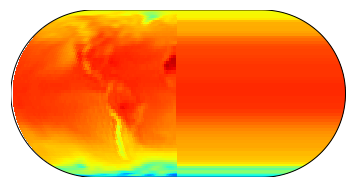

In [0]:
cs = map.pcolor(xi,yi,np.squeeze(tmp), vmin=np.min(air), vmax=np.max(air), cmap=cm.jet)

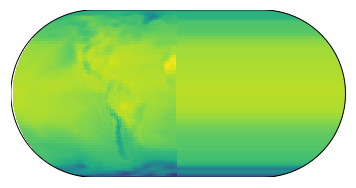

In [0]:
map.pcolor(xi,yi,tmp)

In [0]:
from netCDF4 import date2index

In [0]:
from datetime import datetime

In [0]:
timeindex=date2index(datetime(2012,8,25),nc.variables['time'])

In [0]:
tmp=nc.variables['air'][timeindex]

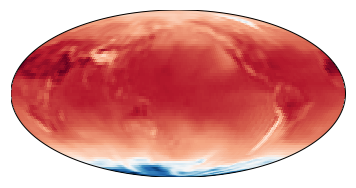

In [0]:
m.pcolormesh(lon,lat,tmp,latlon=True,cmap='RdBu_r')

In [0]:
map1=Basemap(projection='moll',resolution='c',width=2E6,height=2E6,lat_0=lats_0,lon_0=lons_0)

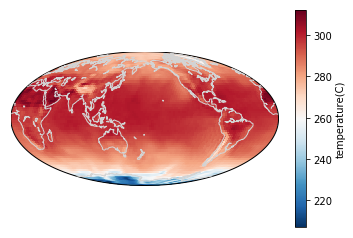

In [0]:
map1.shadedrelief(scale=0.5)
map1.pcolormesh(lon,lat,tmp,latlon=True,cmap='RdBu_r')
map1.drawcoastlines(color='lightgray')
plt.colorbar(label="temperature(C)")

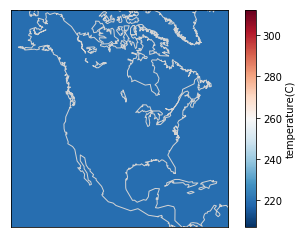

In [0]:
map1=Basemap(projection='lcc',resolution='c',width=8E6,height=8E6,lat_0=45, lon_0=0)
map1.shadedrelief(scale=0.5)
map1.pcolormesh(lon,lat,tmp,latlon=True,cmap='RdBu_r')
map1.drawcoastlines(color='lightgray')
plt.colorbar(label="temperature(C)")


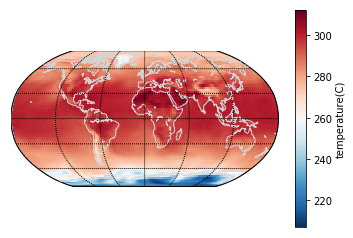

In [0]:
map1=Basemap(projection='robin',resolution='c', lon_0=0)
map1.drawparallels(np.arange(-90.,120.,30.))
map1.drawmeridians(np.arange(0.,360.,60.))
map1.shadedrelief(scale=0.5)
map1.pcolormesh(lon,lat,tmp,latlon=True,cmap='RdBu_r')
map1.drawcoastlines(color='lightgray')
plt.colorbar(label="temperature(C)")


In [0]:
tmp.shape

(73, 144)

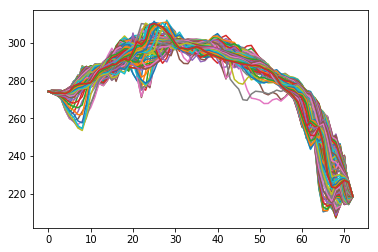

In [0]:
plt.plot(tmp)

In [0]:
ncf=Dataset("G:/r_data/gistemp250.nc")

In [0]:
ncf

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: GISTEMP Surface Temperature Analysis
    institution: NASA Goddard Institute for Space Studies
    source: http://data.giss.nasa.gov/gistemp/
    Conventions: CF-1.6
    history: Created 2018-10-12 16:36:03 by SBBX_to_nc 2.0 - ILAND=250,  IOCEAN=none,     Base: 1951-1980
    dimensions(sizes): lat(90), lon(180), time(1665), nv(2)
    variables(dimensions): float32 lat(lat), float32 lon(lon), int32 time(time), int32 time_bnds(time,nv), int16 tempanomaly(time,lat,lon)
    groups: 

In [0]:
timeindex=date2index(datetime(2015,1,15),ncf.variables['time'])

In [0]:
tmp_ano=ncf.variables['tempanomaly'][timeindex]

In [0]:
time=ncf.variables['time']

In [0]:
import xarray as xr

In [0]:
df=xr.open_dataset('G:/r_data/gistemp250.nc')

In [0]:
lat=41.36;lon=-100.8

In [0]:
dsloc=df.sel(lon=lon,lat=lat,method='nearest')

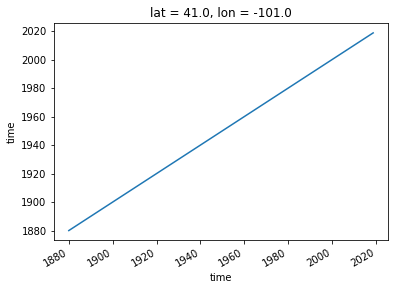

In [0]:
dsloc['time'].plot()

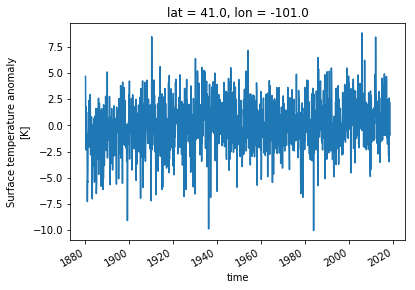

In [0]:
dsloc['tempanomaly'].plot()

In [0]:
time.shape

(1665,)

In [0]:
tmp_ano.shape

(90, 180)

In [0]:
tmp1=tmp_ano.reshape(-1,1)

In [0]:
tmp1.shape

(16200, 1)

In [0]:
tmpsq=np.squeeze(tmp_ano)

In [0]:
tmpsq.shape

(90, 180)

In [0]:
import pandas as pd

In [0]:
data=pd.io.html.read_html("file:///G:/python_data/california_cities.htm")

In [0]:
df=pd.DataFrame(data[0])

In [0]:
df.head()

,Unnamed: 0,Unnamed: 1,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,NaN,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,NaN,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,NaN,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,NaN,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,NaN,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


In [0]:
df.drop(df.columns[[1]],axis=1,inplace=True)

In [0]:
df.drop(df.columns[[0]],axis=1,inplace=True)

In [0]:
df.head()

,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


In [0]:
lat=df['latd'].values

In [0]:
lon=df['longd'].values

In [0]:
pop=df['population_total'].values

In [0]:
area=df['area_total_km2'].values

In [0]:
df['area_total_km2'].mean()

46.753283018867926

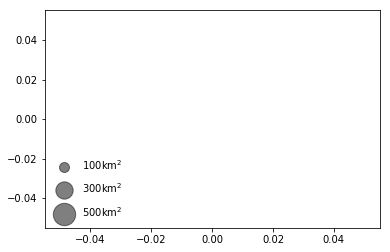

In [0]:
 for a in [100,300,500]:
        plt.scatter([],[],c='k',alpha=0.5,s=a,label=str(a)+'km$^2$')
plt.legend(scatterpoints=1,frameon=False,labelspacing=1,loc='lower left')

In [0]:
fig=plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

In [0]:
m=Basemap(projection='lcc',resolution='h',lat_0=37.5,lon_0=-119,width=1E6,height=1.2E6)

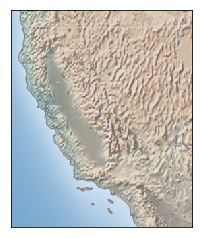

In [0]:
m.shadedrelief()
m.drawcoastlines(color='grey')
m.drawcountries(color='gray')
m.drawstates(color='lightgrey')

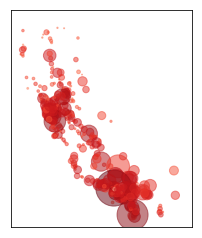

In [0]:
m.scatter(lon,lat,latlon=True,c=np.log10(pop),s=area,cmap='Reds',alpha=0.5)

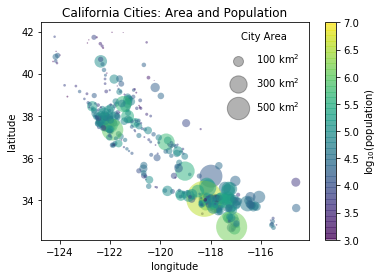

In [0]:
plt.scatter(lon, lat, label=None,
            c=np.log10(pop), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# Here we create a legend:
# we'll plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');

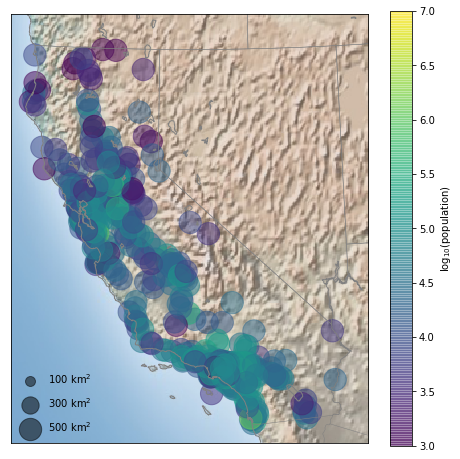

In [0]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=np.log10(pop), s=area,
          cmap='viridis', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

# make legend with dummy points
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');

In [0]:

for a in [100,300,500]:
        plt.scatter([],[],c='k',alpha=0.5,s=a,label=str(a)+'km$^2$')
plt.legend(scatterpoints=1,frameon=False,labelspacing=1,loc='lower left')

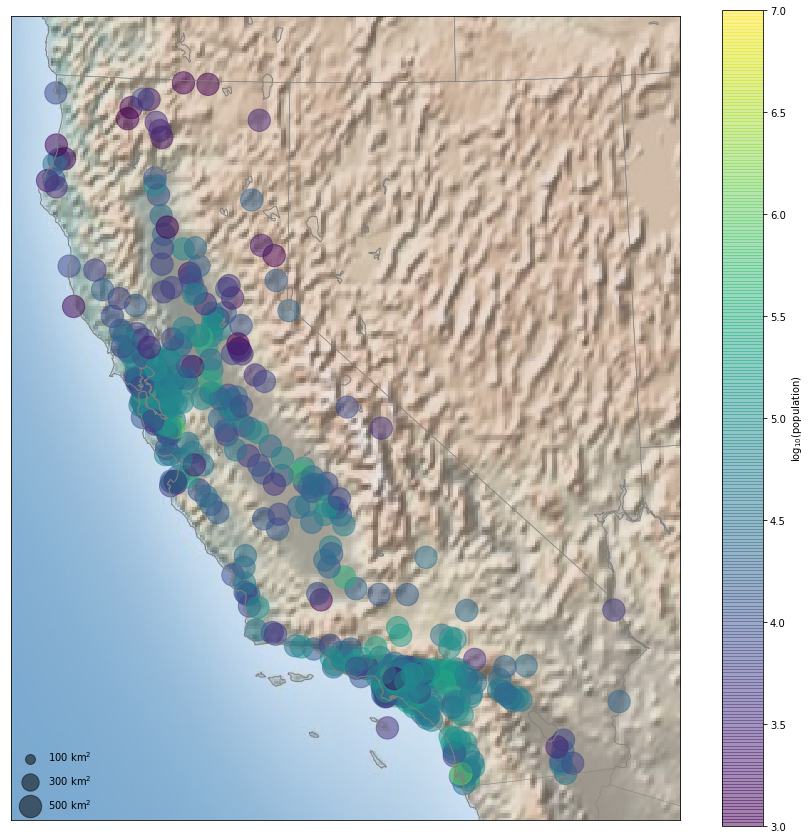

In [0]:
fig = plt.figure(figsize=(15,15))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=np.log10(pop), s=area,
          cmap='viridis', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

# make legend with dummy points
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');

In [0]:
timeindex=date2index(datetime(2015,1,15),ncf.variables['time'])

In [0]:
timeindex

1620

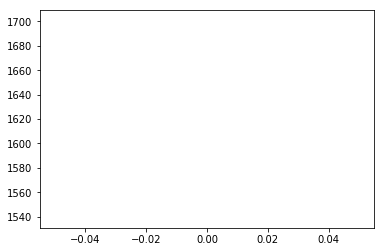

In [0]:
plt.plot(timeindex)

In [0]:
tmp_ano

masked_array(
  data=[[-0.6399999856948853, -0.6399999856948853, -0.6399999856948853,
         ..., -0.6399999856948853, -0.6399999856948853,
         -0.6399999856948853],
        [-0.6399999856948853, -0.6399999856948853, -0.6399999856948853,
         ..., -0.6399999856948853, -0.6399999856948853,
         -0.6399999856948853],
        [-0.6399999856948853, -0.6399999856948853, -0.6399999856948853,
         ..., -0.6399999856948853, -0.6399999856948853,
         -0.6399999856948853],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=32767,
  

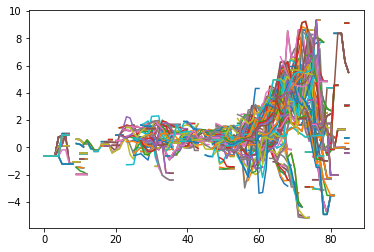

In [0]:
plt.plot(tmp_ano)